<a href="https://colab.research.google.com/github/gauthamkolluru/PythonLabs/blob/master/Problem_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [0]:
df = pd.read_csv('Movie_data.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

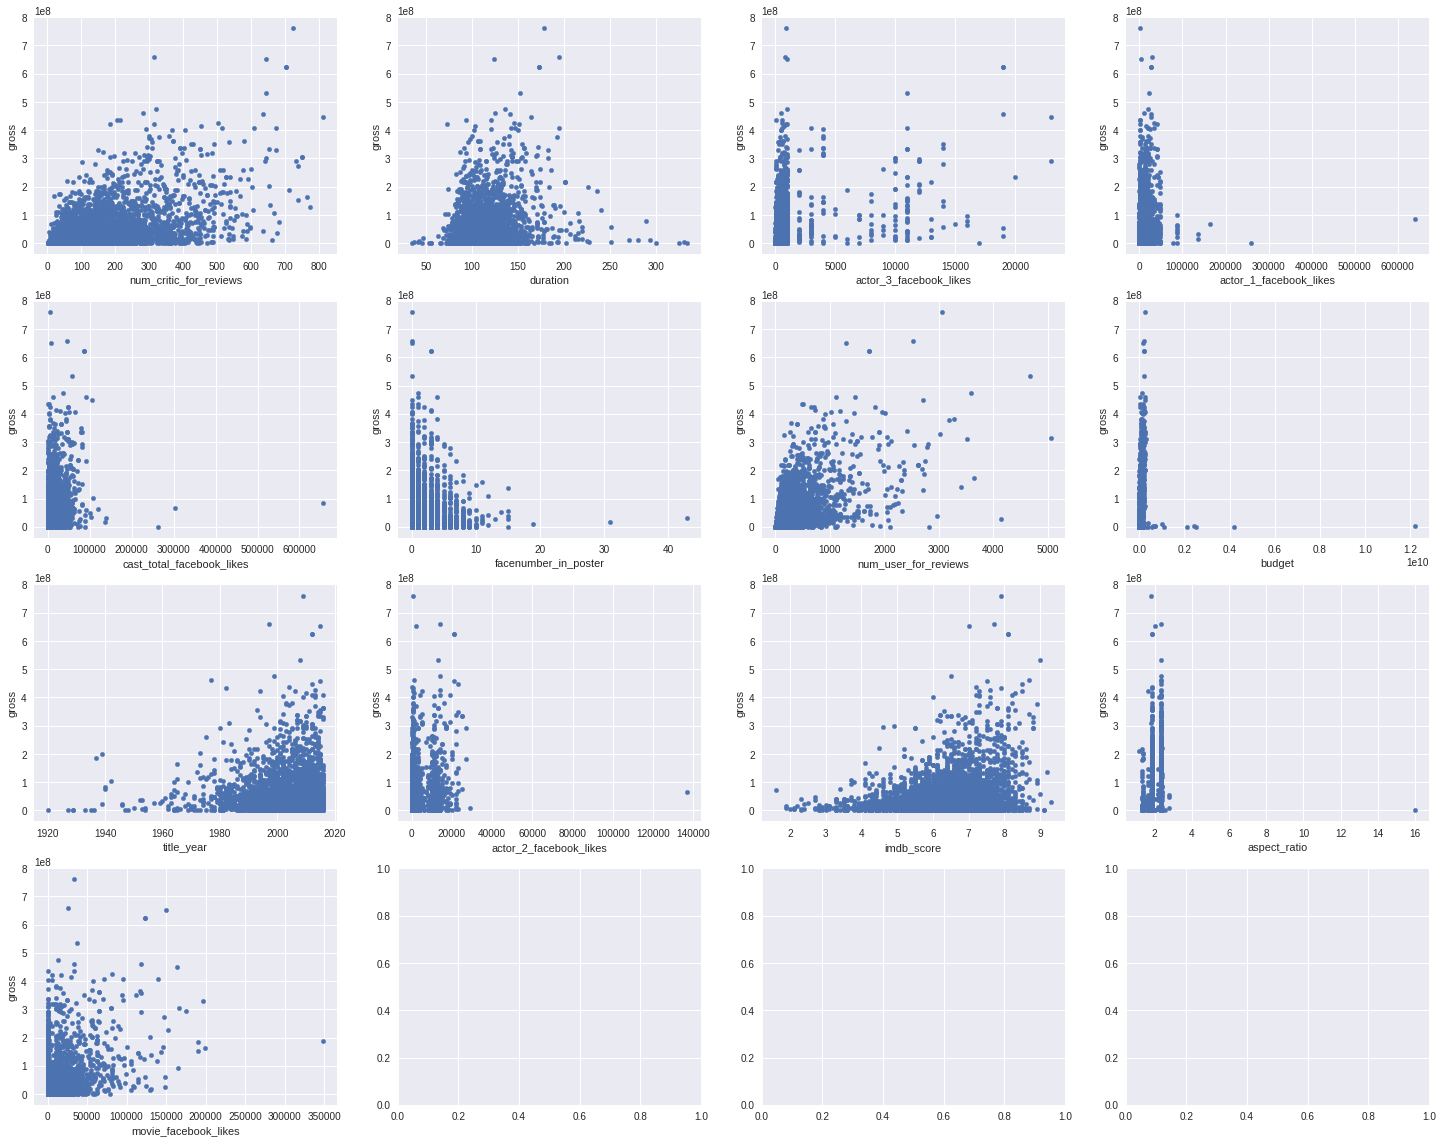

In [5]:
fig, ax = plt.subplots(4,4)
df.plot(kind='scatter',x='num_critic_for_reviews',y='gross',ax=ax[0][0],figsize=(25,20)) #Scatter Plot for features vs labels
df.plot(kind='scatter',x='duration',y='gross',ax=ax[0][1])
df.plot(kind='scatter',x='actor_3_facebook_likes',y='gross',ax=ax[0][2])
df.plot(kind='scatter',x='actor_1_facebook_likes',y='gross',ax=ax[0][3])
df.plot(kind='scatter',x='cast_total_facebook_likes',y='gross',ax=ax[1][0])
df.plot(kind='scatter',x='facenumber_in_poster',y='gross',ax=ax[1][1])
df.plot(kind='scatter',x='num_user_for_reviews',y='gross',ax=ax[1][2])
df.plot(kind='scatter',x='budget',y='gross',ax=ax[1][3])
df.plot(kind='scatter',x='title_year',y='gross',ax=ax[2][0])
df.plot(kind='scatter',x='actor_2_facebook_likes',y='gross',ax=ax[2][1])
df.plot(kind='scatter',x='imdb_score',y='gross',ax=ax[2][2])
df.plot(kind='scatter',x='aspect_ratio',y='gross',ax=ax[2][3])
df.plot(kind='scatter',x='movie_facebook_likes',y='gross',ax=ax[3][0])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09ee27b208>,
      dtype=object)

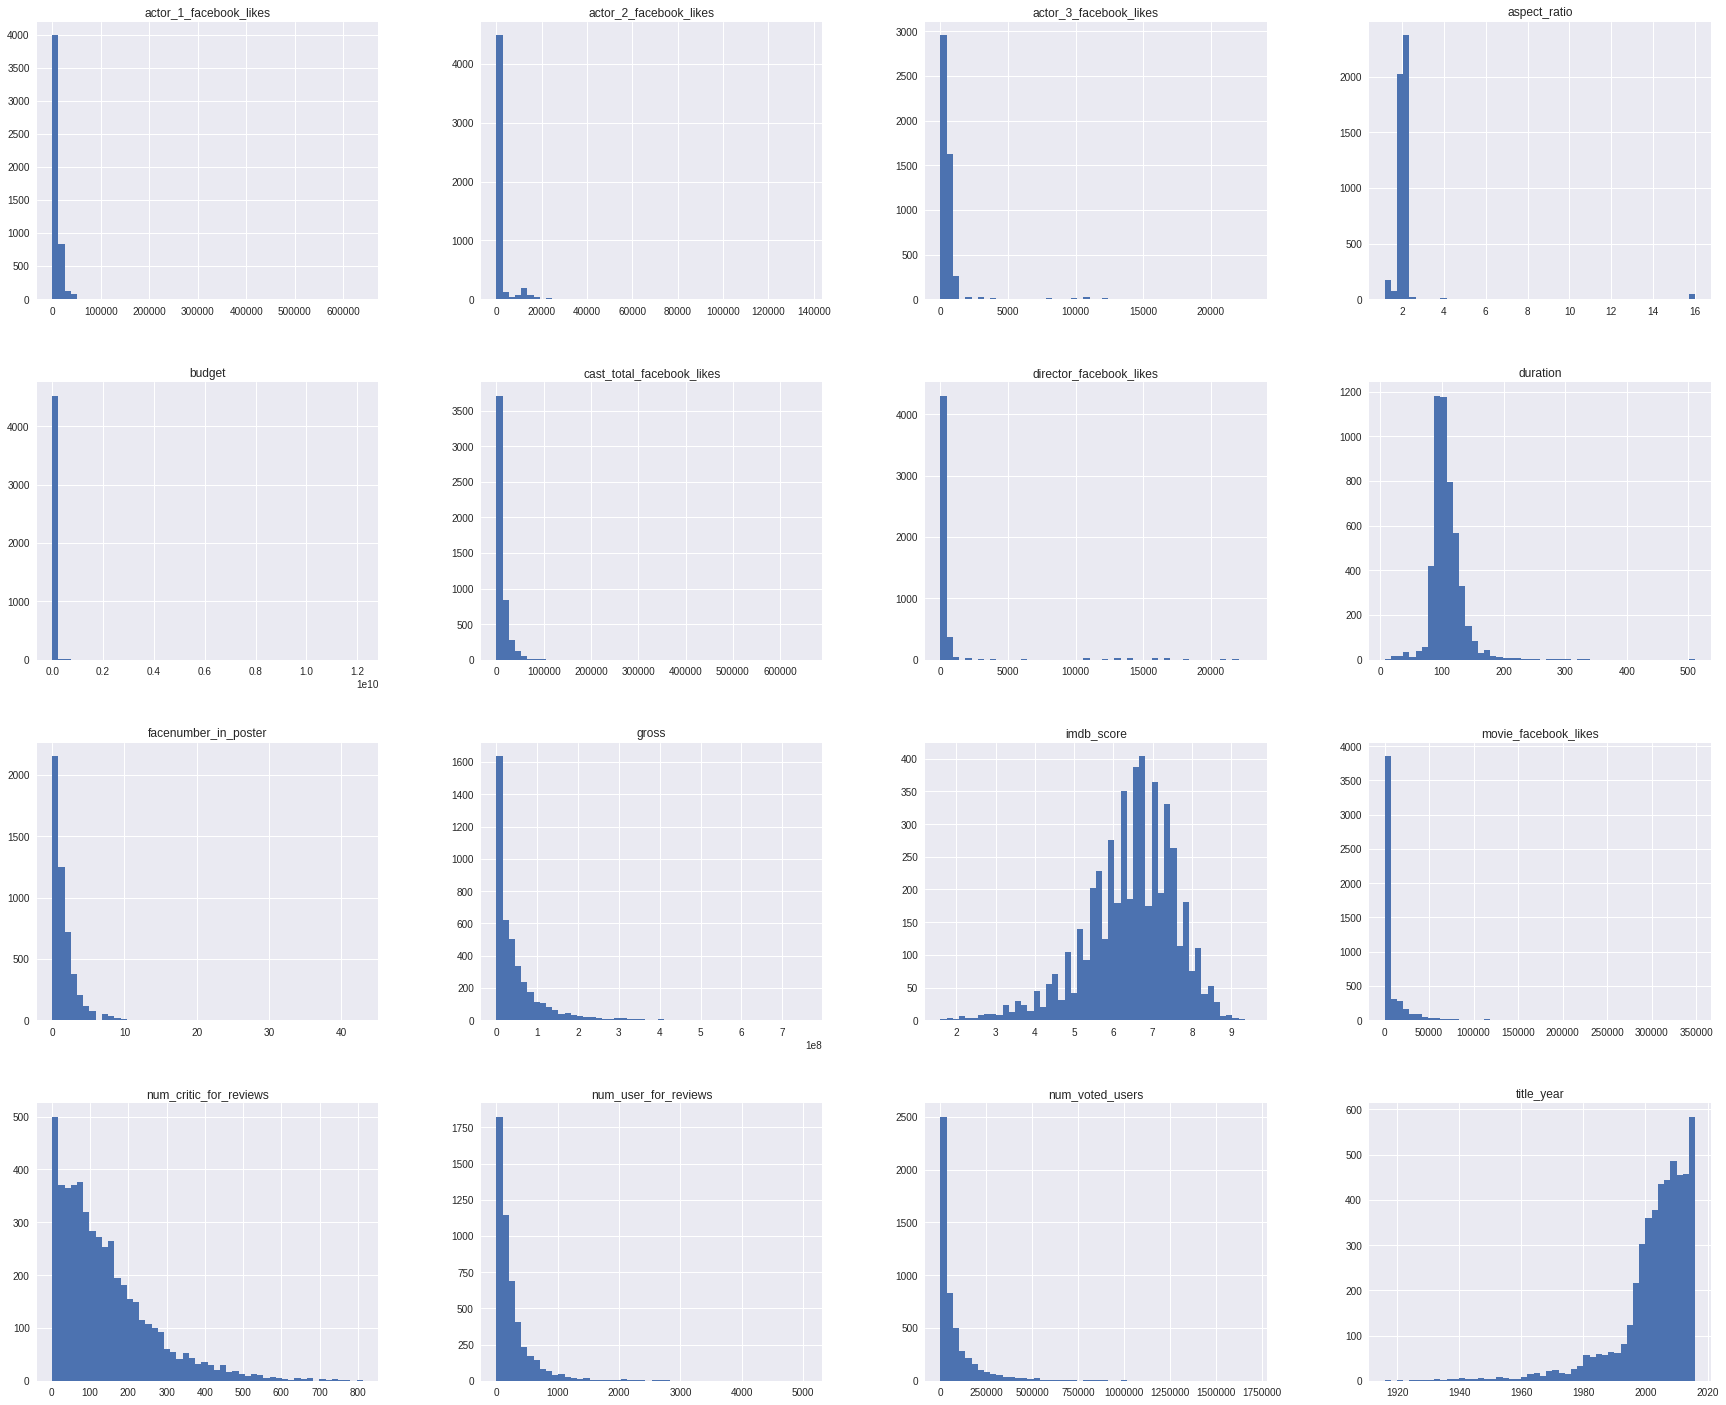

In [6]:
hist_data = df.drop(['color','director_name','content_rating','genres','actor_1_name','movie_title','actor_3_name','movie_imdb_link',],axis=1)
hist_data.hist(bins=50,figsize=(30,25))

In [7]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [8]:
df['color'].mode()

0    Color
dtype: object

In [0]:
df['color'].replace(['Color',np.nan,' Black and White'],[0,0,1], inplace = True)

In [10]:
df['color'].unique()

array([0, 1])

In [0]:
df.director_name.replace(np.nan,'unknown',inplace=True)

In [12]:
num_critic_for_reviews_mean = df['num_critic_for_reviews'].mean()
num_critic_for_reviews_std = df['num_critic_for_reviews'].std()
startVal = num_critic_for_reviews_mean - num_critic_for_reviews_std
stopVal = num_critic_for_reviews_mean + num_critic_for_reviews_std

print(startVal)
print(stopVal)

18.592596584541965
261.7959473770042


In [0]:
df['num_critic_for_reviews'].fillna(value = random.randint(int(startVal),int(stopVal)),inplace=True)

In [14]:
df['num_critic_for_reviews'].head()

0    723.0
1    302.0
2    602.0
3    813.0
4    139.0
Name: num_critic_for_reviews, dtype: float64

In [0]:
df['duration'].fillna(value = df['duration'].mean(),inplace=True)

In [0]:
df['director_facebook_likes'].fillna(value = int(df['director_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_3_facebook_likes'].fillna(value = int(df['actor_3_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_1_facebook_likes'].fillna(value = int(df['actor_1_facebook_likes'].mean()),inplace=True)

In [0]:
df['actor_2_facebook_likes'].fillna(value = int(df['actor_2_facebook_likes'].mean()),inplace=True)

In [20]:
gross_mean = int(df['gross'].mean())
gross_std = int(df['gross'].std())

startVal = gross_std - gross_mean
stopVal = gross_mean + gross_std

print(gross_mean,gross_std)
print(startVal,stopVal)

48468407 68452990
19984583 116921397


In [0]:
df['gross'].fillna(value = random.randint(startVal,stopVal), inplace = True)

In [0]:
df['facenumber_in_poster'].fillna(value = int(df['facenumber_in_poster'].mode()), inplace = True)

In [0]:
df = pd.concat([df,pd.get_dummies(df['director_name'])],axis=1)

In [24]:
df = pd.concat([df,pd.get_dummies(df['genres'])],axis=1)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Mystery|Western,Romance,Romance|Sci-Fi|Thriller,Romance|Short,Sci-Fi,Sci-Fi|Thriller,Thriller,Thriller|War,Thriller|Western,Western
0,0,James Cameron,723.0,178.000000,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,0,0,0,0,0
1,0,Gore Verbinski,302.0,169.000000,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,0,Sam Mendes,602.0,148.000000,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,0,0,0
3,0,Christopher Nolan,813.0,164.000000,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,0,0,0,0
4,0,Doug Walker,139.0,107.201074,131.0,645.0,Rob Walker,131.0,89040514.0,Documentary,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.fillna(value=0,inplace=True)

df.isna().sum()

color                              0
director_name                      0
num_critic_for_reviews             0
duration                           0
director_facebook_likes            0
actor_3_facebook_likes             0
actor_2_name                       0
actor_1_facebook_likes             0
gross                              0
genres                             0
actor_1_name                       0
movie_title                        0
num_voted_users                    0
cast_total_facebook_likes          0
actor_3_name                       0
facenumber_in_poster               0
plot_keywords                      0
movie_imdb_link                    0
num_user_for_reviews               0
language                           0
country                            0
content_rating                     0
budget                             0
title_year                         0
actor_2_facebook_likes             0
imdb_score                         0
aspect_ratio                       0
m

In [0]:
x = df.drop(['director_name','genres','actor_2_name','actor_1_name','actor_3_name','movie_title','gross','language','movie_imdb_link','country','content_rating','aspect_ratio','plot_keywords'],axis=1)

In [0]:
y = df['gross']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.3)

In [0]:
lr = LinearRegression()

In [41]:
lr.fit(x_train.values,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lr.score(x_train,y_train)

0.890826539985648

In [76]:
lr.score(x_test,y_test)

-271514.7615432069

In [0]:
rr = RandomForestRegressor()

In [78]:
rr.fit(x_train.values,y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
rr.score(x_train,y_train)

0.9274930028965538

In [80]:
rr.score(x_test,y_test)

0.5567163817536716

In [0]:
gr = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')

In [85]:
gr.fit(x_train.values,y_train.values)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [86]:
gr.score(x_train,y_train)

0.8867282960782155

In [87]:
gr.score(x_test,y_test)

0.6040627523990725

In [0]:
xr = XGBRegressor(n_estimators = 400, max_depth = 5, learning_rate = 0.1, min_child_weight = 1)

In [106]:
xr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [107]:
xr.score(x_train,y_train)

0.8720652545462426

In [108]:
xr.score(x_test,y_test)

0.5980311242908599